<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Ecuaci%C3%B3n_del_calor_M%C3%A9todo_de_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# METODO IMPLICITO DE RICHARDSON

La solución de la ecuación
$$\frac{\partial u}{\partial t}(x,t) = \alpha \frac{\partial^2 u}{\partial x^2}(x,t)=0     \ \ \ \ 0<x<1 ,\ \ \  0<t$$
sujeta a las restricciones de frontera:
$$u(0,t)=u(1,t)=0,\ \ \ \ \ \ t>0$$

Y la condición:
$$u(x,0)=sen(\pi x), \ \ \ \ \ 0<x \le 1 $$
con $h=0.1$ y $k=0.01$



Vamos a darle la solucion al problema de la ecuación en diferencias utilizando el método y una breve explicación.

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap
t=5

Definimos la función que es nuestra restricción


In [2]:
def f(x):
    return np.sin(np.pi * x)

Vamos a calcular la matriz A correspondiente al problema, dicha matriz fue definida en clase donde se muestra a continuación.

In [3]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])
A


Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

Podemos determinar que el definir la matriz "renglon por renglon" puede llegar a quitar mucho tiempo y es menos practico por lo que debemos de encontrar una manera mas simple para definir la matriz.
Observamos que tambien nos ayuda la definicion de matriz tridiagonal.

**Ejercicio 1**: Codificar la matriz A de manera más simple.

In [4]:
n = 9                                                             # se define el tamaño de la matriz nxn
A = 3*np.eye(n)+np.diag([-1]*(n-1), 1)+np.diag([-1]*(n-1),  -1)  #np.diagonal nos sirve para poner los valor correspondinetes en la diagonal y (n-1) es que n=8 los valos son otros estas matrices la haces por separado y al final las sumamos para que nos de la matriz A correspondiente
A                                                        #al imprimir la matriz A aparte de "verla", es verificar que la matriz este correctamente

array([[ 3., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  3., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  3., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  3., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  3., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  3., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  3., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  3., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  3.]])

Luego de tenemos que definir a b que evalua los difentes puntos en la funcion previamente dada.

In [5]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])#Como sabemos que h=0.1 los valos de b se calculan evaluando en f(x)
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

Haciendo uso de un bucle podemos determinar mas simple los valores en el vector b.

**Ejercicio 2**: Definir las entradas de b de manera más simple (quizás con un bucle).

Teniendo definda la fucion un for puede indicar que vaya cambian los valores de un incio que ir aumentando dependendiendo la condición y cada valor evaluarla en la función f(x), nos ahorramos mcuho tiempo el estar escribiendo uno por uno como lo hicimos anteriormente.

In [6]:
b = sp.Matrix([f(0.1 * i) for i in range(1,10)]) #la funcion va a hacer evaluado en el punto y este va a ir recorriendo su valor con el rango dado.
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

En conlución al pedirle al programa que nos enseñen ya sea ambas matrices codicadas de diferente manera y los valores del vetor b igualmente calculadas de dos formas corroboramos que son los mismo y nos indica que no tenemos fallas en nuestro programa propuesto.

Como ya tenemos a A y b podemos aplicar el metodo de Thomas para tener la factorizacion LU en sympy es muy sencillo ya que esta implementado la funcion para calcularlo y solo con saber codificado tenemos a x.


In [7]:
sp.Matrix(A).LUsolve(b) #Se utiliza la factorización LU para tener a x

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Ahora definimos la función de Richardson como lo vimos en clase

In [8]:
def richardson(A, b, j):
    S = [] #poner ceros en s
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # indicar vector fila
        sol =sp.Matrix(A).LUsolve(b_1) #definimos la sol
        b_1 = sol


    return np.array(S)   # matriz resultado

In [9]:
sol =sp.Matrix(A).LUsolve(b)
sol = np.array(sol, dtype=float).flatten()  # convierte la solución una matriz

Ya podemos hacer uso del metodo de Richardson para obtener la solción de la ecuacio de calor con sus distintas restricciones.

**Ejercicio 4**: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).

Para resolver el ejercicio 4 voy a tomar el valor de t=5 para que me muestre la grafica solicitada. Como dato no podemos tomar t=0 ya quela solucion va hacer la misma (converge) y no habria un punto de diferencia para compararlas


Para calcular la solución exacta hay varias formas lo que yo hice fue que en la solción exacta que en mi programa es "sol" utilice las misma factorizacion LU pero la multiplico por mi vector inicial "b" y con mi solución de Richardon indica que tomara la ultima interación y esta sea diferente.
La otra es calcularla desde cero lo cual nos da lo siguiente:
$$u(x, t) = e^{(-\pi^2  t)}   \sin(\pi  x)
$$
Y dicha ecuación definirla en nuestro programa para despues compararla con la de Richardson.

In [10]:
t=5 #numero de iteraciones en el metodo de Richardson
richardson_solucion = richardson(A, b, t) #Definimos la función de Richardson para t iteraciones
richardson_solucion_t = richardson_solucion[-1]  # Última iteración


In [11]:
x = np.linspace(0.1, 0.9, n)#Número de nodos internos en X Valores para la Malla

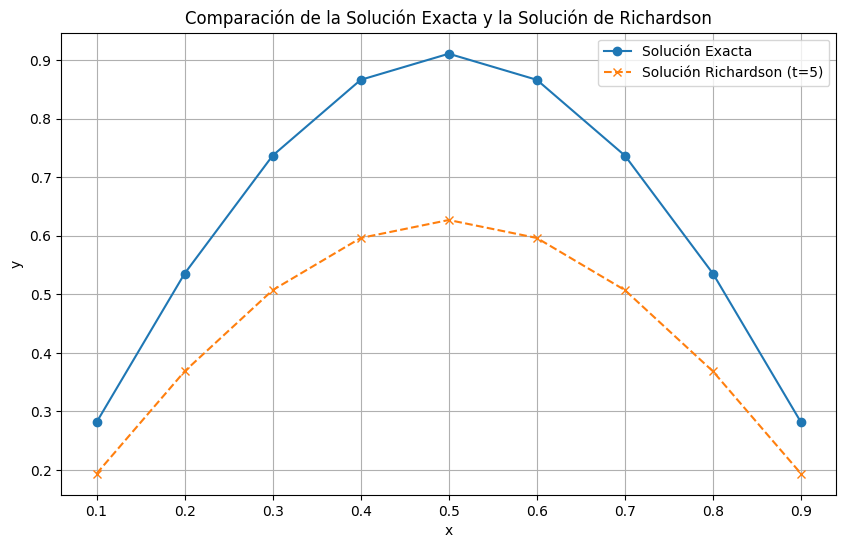

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x, sol, marker='o', linestyle='-', label='Solución Exacta')
plt.plot(x, richardson_solucion_t, marker='x', linestyle='--', label=f'Solución Richardson (t={t})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de la Solución Exacta y la Solución de Richardson')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio 5**:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

Como toda función o problema lo que buscamos es optimizar el tiempo de calculos, las iteraciones , trabajo, etc, y si queremos llegar a la solución o solo a una aproximada, dependiendo de lo que busquemos optimizar podemos buscar una solucion es este caso queremos saber si es necesario resolver el sistema 9x9 en este caso podria ser buscar algun patron en la matriz para poder factorizarla un poco mas o fijarnos en el vector b si podemos reducir los terminos. En nuestro caso como la matriz 9x9 que tenemos esta "factorizada" como una matriz tridiagonal nos indica que su estructura ya es un simplificación.

In [13]:
j = 20 # Número de pasos en el tiempo

In [14]:
U=richardson(A, b, j)  #Definimos a U como la ecuación de Richardson

In [15]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo) para tener mejor proyeccion de la grafica
X, Y = np.meshgrid(x, y)

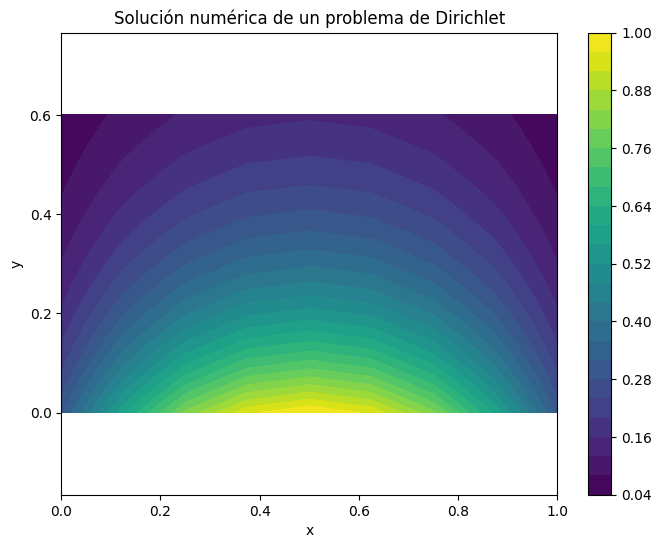

In [16]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title("Solución numérica de un problema de Dirichlet")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

Explicar la gráfica

En la grafica mapa de colores  podemos interpretar la aproximación a la solución numerica del problema en un dominio dado con nuestras condiciones de frontera, donde los colores indican los rangos de valores de la solución obtenida en el programa , el color amarillo nos proporciona los valores donde la solución es la mejor o igual a cero y conforme se va "descolorando" son los nuevos valores que toman cada nodo en los diferentes puntos proporcionados. Es muy sencillo observar que la grafica tambien tiene cierta corvartura que va desendiendo hasta formar un linea horiontal.

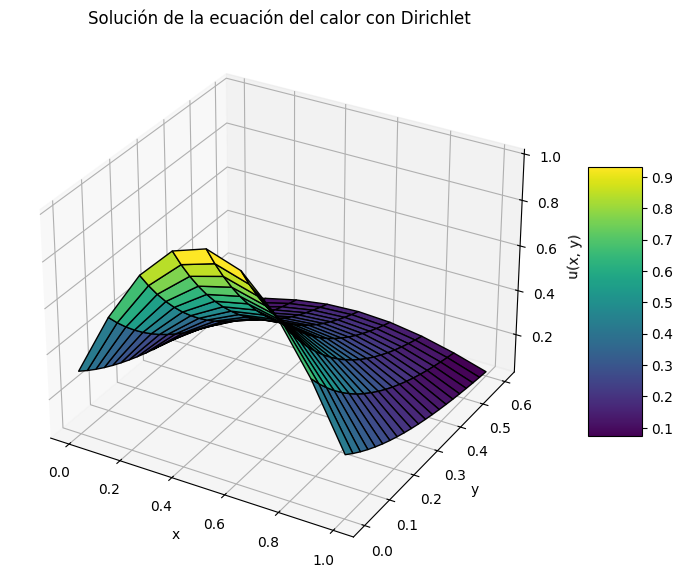

In [17]:

%matplotlib inline

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Explicar la gráfica

En esta grafica no pude lograr que obtuviera movimiento pero al poner %matplotlib inline el codigo puede ejecutarse y mostarme la grafica, siguiendo es paracido a la grafica anterior solo que esta es en 3D y podemos visualizar mucho mejor los nodos de la malla obtenida en problema. De igual forma el color en cada "rectangulo" podemos decir que va son diferentes valores en cada uno y por ultimo vemos que la forma que tiene la solución es una superficie curvada.

En conclusión las graficas tienen una continuidad de calor, su temperatura es constante en los bordes y conforme se alejan de los bordes va cambiando, su pendiente que observamos es donde su gradiente de temperatura es mucho mayor o sea son mas grandes a los de una superficie plana.


**Ejercicio 6**: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

El ligero detalle con la precisión lo podemos asociar a la resolución de la malla, que consiste en dividir el dominio  en el numero de puntosen la malla  y conforme mayor cantidad de puntos  mejor precisión y resolución tenemos ya que captura mejor los detalles de cada iteración y observamos en esta si tiene algunos cambios por muy minimos que sean. Debemos usar mas puntos en la resolución de la malla para mejorar ese ligero detalle sobre la precisión en las grafica.

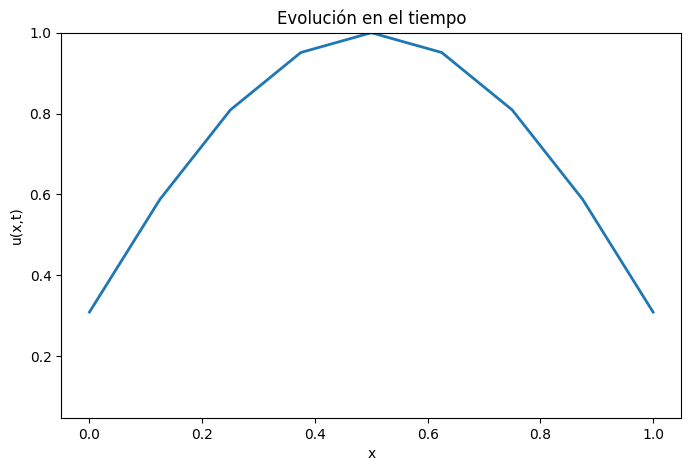

In [18]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U[0], lw=2)
ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

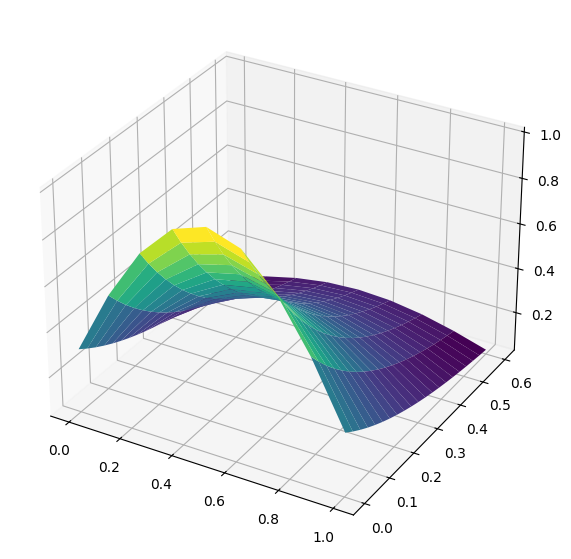

In [19]:

%matplotlib inline
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis)
plt.show()